In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import os
print(os.getcwd())

C:\Users\mo\Downloads\Machine Learning\Natural-language-processing


In [2]:
dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter='\t', quoting=3)


In [4]:

# steaming for only present form of verb and translating past verb to present.
#Cleaning the texts
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [5]:

corpus=[]
for i in range(0,1000):
    review=re.sub('[^a-zA-Z]',' ', dataset['Review'][i] )
    review=review.lower()
    review=review.split()
    ps=PorterStemmer()
    review=[ ps.stem(word) for word in review if not word in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)




In [6]:

from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer(max_features=1500)
X=cv.fit_transform(corpus).toarray()
y=dataset.iloc[:,1].values



In [9]:

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [10]:

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)



In [11]:


#fitting the classifier to the training set
from sklearn.naive_bayes import GaussianNB
classifier= GaussianNB()
classifier.fit(X_train,y_train)


GaussianNB()

In [15]:


#Predicting the test set results
y_pred=classifier.predict(X_test)



In [16]:

#making the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)



In [19]:
import seaborn as sns
import matplotlib.pyplot as plt


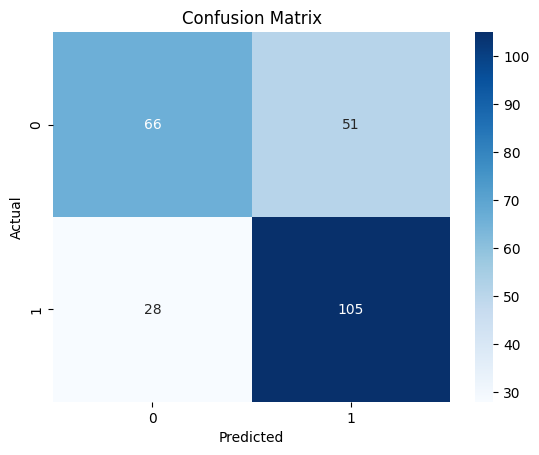

In [20]:

# Create the confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred)

# Create a heatmap
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')

# Add labels and a title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()